In [43]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
img_rows, img_cols = 28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)
else: 
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1) 
  
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255



In [41]:
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 

In [42]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
layer4 = Dropout(0.5)(layer3) 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6) 


In [46]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy']) 
  
history=model.fit(x_train, y_train, epochs=12, batch_size=500, validation_data=(x_test, y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.6916 - accuracy: 0.7855 - val_loss: 0.2260 - val_accuracy: 0.9371
Epoch 2/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1996 - accuracy: 0.9439 - val_loss: 0.1101 - val_accuracy: 0.9682
Epoch 3/12
60000/60000 [==============================] - 128s 2ms/step - loss: 0.1260 - accuracy: 0.9648 - val_loss: 0.0757 - val_accuracy: 0.9768
Epoch 4/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0959 - accuracy: 0.9723 - val_loss: 0.0592 - val_accuracy: 0.9817
Epoch 5/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0772 - accuracy: 0.9769 - val_loss: 0.0518 - val_accuracy: 0.9838
Epoch 6/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0660 - accuracy: 0.9804 - val_loss: 0.0425 - val_accuracy: 0.9857
Epoch 7/12
60000/60000 [==============================] - 129s

In [47]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               1024

In [35]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 

loss= 0.030068779583694413
accuracy= 0.9904000163078308


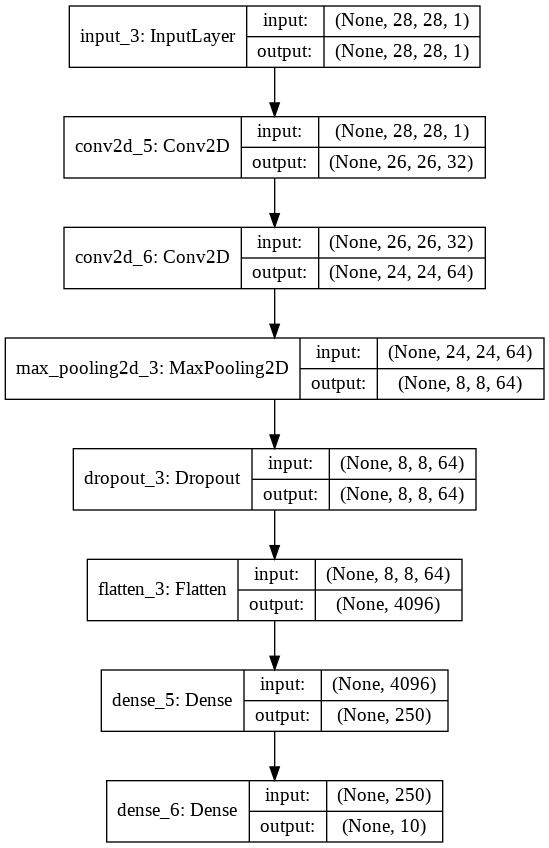

In [36]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical

loss_train = history.history['train_loss']  
loss_val = history.history['val_loss']
epochs = range(1, 35)
plt.plot(epochs, loss_train, 'g', label='')

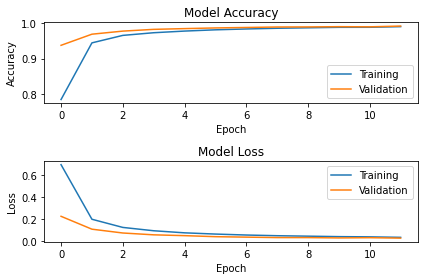

In [48]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

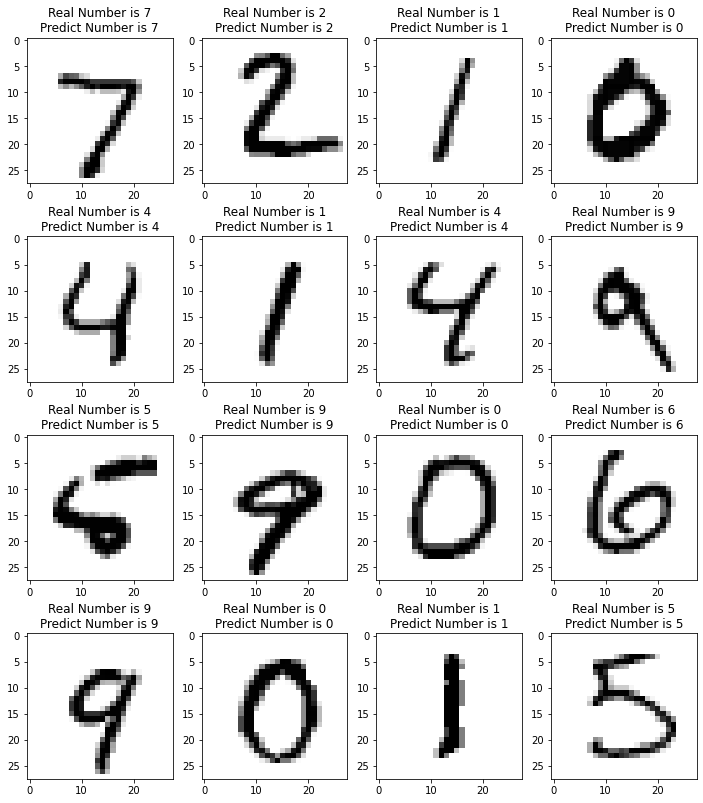

In [45]:
y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");